### Signal to Noise Calculations

The SNR is calculated following the equation (see, e.g., pg 407 of "Spectroscopic Instrumentation" by Eversberg and Vollmann): 

$SNR = \frac{I t}{\sqrt{I t + B t + D t + R^2}}$, 

where I is the signal over some number of pixels, B is the sky background over some number of pixels, D is the dark current over some number of pixels and R is the readout noise of the detector.  The exposure time, t, is usually given in seconds.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

In [3]:
def Dragonfly():
    area_lens = np.pi*(14.3/2)**2 * 48. * u.cm**2               # 48 * 14.3 cm diameter lenses
    pix_size = 2.8                                              # arcsec
    ang_size_pixel  = (pix_size * (1./206265.))**2 * u.rad**2   # rad^2, the pixel size of the CCD

    tau_l = 0.85  # transmittance of the Dragonfly lens
    QE = 0.70 #QE = 0.48     # quantum efficiency of the CCDs
    tau_f = 1.    # transmittance of the Halpha filter -- assumed for now

    # The following are per pixel
#    B = 0.52135 *u.photon/u.second/u.nm/u.arcsec**2/u.m**2  # sky background at 565.6 nm 
    D = 0.04 *u.photon/u.second                             # dark current (electrons / s) -- PER PIXEL??
#    R_squared = 10.**2 * u.photon                           # read noise (electrons)
    R_squared = 1.**2 * u.photon                           # read noise (electrons)


    return [area_lens, ang_size_pixel, pix_size, tau_l, tau_f, QE, D, R_squared]

In [4]:
def getBackground(start,end):
    wavelength = []
    flux = []
    with open('/Users/deblokhorst/Documents/Dragonfly/DragonflyHalpha/Notebooks/Gemini_skybackground.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                wavelength.append(tmp[0])
                flux.append(tmp[1])
                
    wavelength = np.array(wavelength,'d')
    flux = np.array(flux,'d')
    
    start_ind = (np.abs(wavelength-start)).argmin()
    end_ind   = (np.abs(wavelength-end)).argmin()
    
    # since spacings are even, can just take the average of the flux array and times it by the total bandwidth
    return np.mean(flux[start_ind:end_ind])*(wavelength[end_ind]-wavelength[start_ind])

    

### IGM Filaments

Excitingly, I now have actual EAGLE simulation data to play with and get real numbers from their H$\alpha$ simulations.  In the following section, I take the estimates of surface brightness from selected regions in different simulations.  The simulations vary in box width (analogously to filter bandwidth) and redshift.  

I will include SFing regions in the analysis.

These simulations have not yet been convolved with a PSF (waiting for Nastasha to finish debugging her code, or for me to have enough time to go through her code myself and get it running).

Brace yourselves, because the H$\alpha$ emission looks *extremely* faint.  (crosses her fingers and grimaces)

In [10]:
# pick numpixels to bin over:
pixsize = 2.8   # arcsec
numpixels= np.array([(100.*100.)/(pixsize**2),(10.*10.)/(pixsize**2),1.])
numpixel = 100.0 * 100.0/(pixsize**2)   # 100-arcsec-a-side pixels

#   scale_50  = 0.206 #kpc/"  ## at z = 0.01 (about 50 Mpc)
#   scale_100 = 0.467 #kpc/"  ## at z = 0.023 (about 100 Mpc)
#   scale_200 = 0.928 #kpc/"  ## at z = 0.047. (about 200 Mpc)
### basically, you can bin twice as much per side if you go twice as much closer

[area_lens, ang_size_pixel, pix_size, tau_l, tau_f, QE, D, R_squared] = Dragonfly()

print([area_lens, ang_size_pixel, pix_size, tau_l, tau_f, QE, D, R_squared])
wavelen = 656.3e-9 * u.m

### SB of IGM filaments
#Average logSB in the selected region: 2.63944307544
#Median logSB in the selected region:-1.37115943432
SB_ph_1 = 10**2.639443 * u.photon / (u.cm**2 * u.rad**2 * u.second) # threshold from Steidel et al 2011 plus long translations
SB_ph_2 = 10**-1.37116 * u.photon / (u.cm**2 * u.rad**2 * u.second)  # from van de Voort & Schaye 2013
#Max SB in the selected region: -0.450042337179
#Average SB in the selected region: -1.28205479715
#Median SB in the selected region:-1.52137815952
#['SBdata_5', 'SBdata_10', 'SBdata_15', 'SBdata_20']   -- numbers are the width of the regions
#Average SB in the selected region: [ 2.63944308  2.63944324  2.63946358  2.66657444]
#Median SB in the selected region:[-1.37115943 -1.36929631 -1.36385357 -1.26499414]

#### snapnum 28
#['SBdata_5', 'SBdata_10', 'SBdata_15', 'SBdata_20']
#Average SB in the selected region: [ 2.51163479  2.511635    2.51163552  2.60486156]
#Median SB in the selected region:[-1.29914451 -1.29799104 -1.29510307 -1.23004115]

SB_ph_2 = 10**-0.45004 * u.photon / (u.cm**2 * u.rad**2 * u.second)  # from van de Voort & Schaye 2013

### snapnum 27
SB_ph_5   = 10**2.63944308 * u.photon / (u.cm**2 * u.rad**2 * u.second)
SB_ph_10  = 10**2.63944324 * u.photon / (u.cm**2 * u.rad**2 * u.second)
SB_ph_15  = 10**2.63946358 * u.photon / (u.cm**2 * u.rad**2 * u.second)
SB_ph_20  = 10**2.66657444 * u.photon / (u.cm**2 * u.rad**2 * u.second)
### snapnum 28
#SB_ph_5   = 10**2.51163479 * u.photon / (u.cm**2 * u.rad**2 * u.second)
#SB_ph_10  = 10**2.511635 * u.photon / (u.cm**2 * u.rad**2 * u.second)
#SB_ph_15  = 10**2.51163552 * u.photon / (u.cm**2 * u.rad**2 * u.second)
#SB_ph_20  = 10**2.60486156 * u.photon / (u.cm**2 * u.rad**2 * u.second)

### snapnum 28
SB_ph_5_1 = 
SB_ph_5_2 = 
SB_ph_5_3 = 

print('Surface brightness: '+str(SB_ph_5))
print('Surface brightness: '+str(SB_ph_20))

[<Quantity 7709.091380790922 cm2>, <Quantity 1.8427438923353984e-10 rad2>, 2.8, 0.85, 1.0, 0.7, <Quantity 0.04 ph / s>, <Quantity 1.0 ph>]
Surface brightness: 435.956422437 ph / (cm2 rad2 s)
Surface brightness: 464.060325163 ph / (cm2 rad2 s)


0.410431333333 ph / (arcsec2 m2 nm s)
1.47327272727 ph / (arcsec2 m2 nm s)
Halpha Signal: 0.000368492132459 ph / s
Background Sky: 1.13014602475 ph / s
Halpha Signal: 0.000392246954072 ph / s
Background Sky: 15.8942416038 ph / s


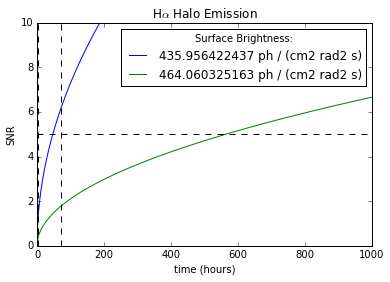

In [19]:
# pick how long to calculate SNR over
time = np.arange(1,60.*60.*1000000.,1000)* u.second
time = np.arange(1,60.*60.*100.*10.)* u.second
#time = np.arange(1,60.*60.*100.*20.)* u.second
limit = time[-1]/u.second

# 5 Mpc, 
filterwidth_5 = 0.7657* u.nm 
B_5 = getBackground(656.3,657.0657)*u.photon/u.second/u.nm/u.arcsec**2/u.m**2
print(B_5)
# 20 Mpc, 
filterwidth_20 = 3 * u.nm
B_20 = getBackground(656.3,659.3)*u.photon/u.second/u.nm/u.arcsec**2/u.m**2
print(B_20)

for SB_ph in [SB_ph_5, SB_ph_20]:
    if SB_ph == SB_ph_5:
        B = B_5
        filterwidth = filterwidth_5
    if SB_ph == SB_ph_20:
        B = B_20
        filterwidth = filterwidth_20

    ## Signal
    S = SB_ph * QE * tau_l * tau_f * area_lens * ang_size_pixel
    signal = S*time*numpixel
    ## Noise
    B_tot = B * QE * tau_l * tau_f * filterwidth * area_lens.to(u.m**2) * ang_size_pixel.to(u.arcsec**2)
    sigma = np.sqrt(signal + B_tot*time*numpixel + D*time*numpixel + R_squared*numpixel)

    # Note that the signal is about an eighth the strength of the background sky signal: IS THIS TRUE HERE?
    print('Halpha Signal: '+str(S))
    print('Background Sky: ' +str(B_tot))

    plt.plot(time/3600., signal/sigma, label=str(SB_ph))#,label= 'num pixels '+str(round(numpixel)))

plt.plot([0,limit/3600.],[5,5],'k--')   
plt.title(r'H$\alpha$ IGM Emission')
plt.legend(title='Surface Brightness:')
plt.xlim(0,limit/3600.)
plt.ylim(0,10)
plt.xlabel('time (hours)')
plt.ylabel('SNR')

plt.plot([4.,4.],[0,10],'k--')  # ~4 hour ~250min
plt.plot([70,70],[0,10],'k--')  # ~70 hour ~4200min


plt.savefig('HalphaIGMemission.pdf')

In [6]:
slicewidth = 20 #Mpc

v = 

1.47327272727 ph / (arcsec2 m2 nm s)


In [5]:
0.206 * 100 # kpc

20.599999999999998

different factors:
- distance from us:  determines how many pixels we can bin over, H$\alpha$ SB may also change
- width of filter/slice: determines how much signal to background we will end up getting


v_20 = H_0 * d = 70 km/s/Mpc * 20 Mpc = 1400 km/s

z ~ v/c = delta(lambda)/lambda

delta(lambda) = lambda * v / c = 656.3nm * 1400 km/s / 300000 km/s = 3 nm


v_5 = H_0 * d = 70 km/s/Mpc * 5 Mpc = 350 km/s

z ~ v/c = delta(lambda)/lambda

delta(lambda) = lambda * v / c = 656.3nm * 350 km/s / 300000 km/s = 0.7657 nm


In [14]:
656.3*1400/300000

3.062733333333333

In [15]:
0.7657 + 656.3

657.0657

In [16]:
# 5 Mpc, filter width is: 0.7657 nm 
B_5 = getBackground(656.3,657.0657)*u.photon/u.second/u.nm/u.arcsec**2/u.m**2
print(B_5)
# 20 Mpc, filter width is: 3 nm
B_20 = getBackground(656.3,659.3)*u.photon/u.second/u.nm/u.arcsec**2/u.m**2
print(B_20)



0.410431333333 ph / (arcsec2 m2 nm s)
1.47327272727 ph / (arcsec2 m2 nm s)


In [ ]:
def SB_photonscgs_to_ABmagarcsec(sb):
    fld = sb * cons.planck * (4*np.pi)/3600**2 # flux density: energy / (m**2 s)  /frequency (/arcmin**2)  sufrace brightness: photons / (cm**2 s) /sr       
    return -2.5*np.log10(fld/(3631.*Jy))